<a href="https://colab.research.google.com/github/Lrs-mtos/song-popularity-ML/blob/develop_adrian/sp_experimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - OBTENDO OS DADOS**

## 1.1 - Configuração


In [99]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## 1.2 - Obtendo os dados

In [2]:
import os
import requests
import zipfile
import pandas as pd


url = "https://www.kaggle.com/api/v1/datasets/download/joebeachcapital/30000-spotify-songs"
zip_path = "spotify_songs.zip"
extract_path = "./datasets"
#create dataframe songs:


# Faz o download do arquivo zip
response = requests.get(url)
with open(zip_path, "wb") as file:
    file.write(response.content)
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

## 1.3 - Conferindo rapidamente o dataset

In [3]:
csv_path = os.path.join(extract_path, "spotify_songs.csv")
songs = pd.read_csv(csv_path)
print(songs.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [4]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
pd.set_option('display.max_rows', None)
songs["playlist_genre"].value_counts()

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

## 1.4 - Criando conjunto de teste



In [6]:
#to make this notebook's output identical at every run
np.random.seed(42)

train_set, test_set = train_test_split(songs, test_size=0.2, random_state=42)
len(train_set)

26266

In [7]:
len(test_set)

6567

# **2 - EXPLORANDO OS DADOS**


## Criando uma cópia dos dados para exploração.

In [8]:
songs_cp = songs.copy()

# **3 - PREPARANDO OS DADOS**

## 3.1 - Definição das **Funções para tratamento dos dados**.

In [9]:
# REMOÇÃO DE DUPLICATAS - remove músicas repetidas

def removeDuplicates(df):
    # Adiciona uma coluna auxiliar com o nome da música em lowercase
    df['track_name_lower'] = df['track_name'].str.lower()
    # Remove duplicadas usando a coluna auxiliar
    df_unique = df.drop_duplicates(subset=['track_artist', 'track_name_lower'])
    # Remove a coluna auxiliar antes de retornar
    df_unique = df_unique.drop(columns=['track_name_lower'])
    return df_unique

In [77]:
def onehotTopArtists(df):
    df['track_popularity'] = df['track_popularity'].fillna(0)

    artist_stats = df.groupby('track_artist').agg(
        soma_popularidade=('track_popularity', 'sum'),
        qtd_musicas=('track_popularity', 'count')
    ).reset_index()

    # Média ponderada com suavização
    artist_stats['popularidade_artist'] = artist_stats['soma_popularidade'] / (artist_stats['qtd_musicas'])

    # Criar dicionário de popularidade
    artist_popularity_dict = artist_stats.set_index('track_artist')['popularidade_artist'].to_dict()

    # Substituir nome do artista pela popularidade
    df['track_artist'] = df['track_artist'].map(artist_popularity_dict)

    return df.drop(columns=['track_name'], errors='ignore')

In [11]:
# REMOÇÃO DE COLUNAS - Remove colunas não úteis para a predição.

def removeColumns(df, columns_name):
    return df.drop(columns=columns_name)

In [12]:
# REMOÇÃO DE LINHAS - Remove linhas que possuem dados em branco e que não podem ser obtidos por meio de outros dados.

#Utilizar depois de remover as colunas que não serão necessárias para a predição do modelo.
def removeRowNaN(songs_cp):
    songs_cp_sem_nulos = songs_cp.dropna(axis=0, how='any')
    return songs_cp_sem_nulos

def dropRowsEmpty(songs_cp):
    songs_cp_sem_nulos = removeRowNaN(songs_cp)
    valores_nulos_por_coluna = songs_cp_sem_nulos.isna().sum()
    print("\nQuantidade de valores nulos por coluna:")
    songs_cp = songs_cp_sem_nulos
    print(valores_nulos_por_coluna)
    return songs_cp


In [13]:
# NORMALIZAÇÃO DE DADOS NUMÉRICOS

#Normaliza os dados numa escala de 0 a 1.
def normalizeColumns(df,columns_name):
    scaler = MinMaxScaler()
    df[columns_name] = scaler.fit_transform(df[columns_name])
    return df

In [14]:
# ONEHOT para as variáveis categóricas que possuem um número pequeno de categorias.

def onehotEncode(df, columns):
    pd.get_dummies(df, columns=columns, prefix=columns)

In [15]:
def fillMonths(songs: pd.DataFrame) -> pd.DataFrame:
    # Filtrar as linhas onde a data de lançamento tem apenas o ano (4 caracteres)
    df_ano_apenas = songs[songs['track_album_release_date'].str.len() == 4].copy()

    # Filtrar as linhas onde a data de lançamento tem o formato completo (ano-mês-dia)
    df_completo = songs[songs['track_album_release_date'].str.len() == 10].copy()

    # Extrair o mês das músicas com ano-mês-dia
    df_completo['month'] = df_completo['track_album_release_date'].str[5:7]

    # Contar a frequência de cada mês
    month_counts = df_completo['month'].value_counts()

    # Agora vamos preencher os meses nas músicas com ano apenas, de forma proporcional
    months_to_fill = []

    for month, count in month_counts.items():
        months_to_fill.extend([month] * count)

    # Para as músicas faltando mês, vamos preencher com base na lista 'months_to_fill'
    df_ano_apenas['month'] = np.random.choice(months_to_fill, size=len(df_ano_apenas))

    # Agora vamos juntar os dois DataFrames (completo e preenchido) novamente
    df_completo['month'] = df_completo['month']  # As músicas já completas não devem ser modificadas
    df_ano_apenas['track_album_release_date'] = df_ano_apenas['track_album_release_date'] + '-' + df_ano_apenas['month'] + '-01'

    # Substituir as linhas no DataFrame original
    songs.update(df_completo)
    songs.update(df_ano_apenas)

    # Garantir que o retorno seja um DataFrame, não uma Series ou estrutura não 2D
    return songs[['track_album_release_date']]



In [16]:
def decompositionDateTransform(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df['track_year'] = df[date_column].dt.year
    df['track_month'] = df[date_column].dt.month
    df['track_day'] = df[date_column].dt.day
    df['track_weekday'] = df[date_column].dt.weekday
    return df.drop(columns=[date_column], errors='ignore')


In [17]:
# DECOMPÕE 'duration_ms' EM 'track_minutes' E 'track_seconds'.

def MilisecondsTransform(df, column_name):
    df['track_minutes'] = df[column_name] / 60000  # Convertendo milissegundos para minutos
    df['track_seconds'] = (df[column_name] % 60000) / 1000  # Restante em segundos
    return df.drop(columns=[column_name], errors='ignore')

In [18]:
# CLASSIFICA A COLUNA 'duration_ms' EM 0,1,2,3,4,5 e 6, NA COLUNA 'track_duration_classification'

def classifyDuration(df, millis_column):
    def classify(millis):
        if isinstance(millis, (int, float)) and millis >= 0:
            duration_minutes = millis / 60000
            if duration_minutes == 0:
                return 0
            elif duration_minutes <= 1:
                return 1
            elif duration_minutes <= 2:
                return 2
            elif duration_minutes <= 3:
                return 3
            elif duration_minutes <= 4:
                return 4
            elif duration_minutes <= 5:
                return 5
            else:
                return 6
        return None

    df['track_duration_classification'] = df[millis_column].apply(classify)
    return df

In [19]:
# RETORNA OS DADOS DISCRETIZADOS E POSSÍVEIS OUTLIERS

def discretizeAndPossibleOutliers(data, n_bins=10, metodo='quantis'):
    if metodo == 'quantis':
        # Discretização baseada em quantis (divide os dados em n_bins intervalos com número igual de dados)
        bins = np.percentile(data, np.linspace(0, 100, n_bins+1))
        labels = [f'Intervalo {i+1}' for i in range(n_bins)]
        data_discretizada = pd.cut(data, bins=bins, labels=labels, include_lowest=True)
    elif metodo == 'igual':
        # Discretização por intervalos iguais (divide os dados em n_bins intervalos de tamanho igual)
        bins = np.linspace(data.min(), data.max(), n_bins+1)
        labels = [f'Intervalo {i+1}' for i in range(n_bins)]
        data_discretizada = pd.cut(data, bins=bins, labels=labels, include_lowest=True)
    else:
        raise ValueError("ERROR: 'quantis' ou 'igual'.")

    # Visualizar os dados discretizados
    sns.histplot(data_discretizada, kde=False, discrete=True, color='skyblue')
    plt.title('Distribuição dos Dados Discretizados')
    plt.xlabel('I')
    plt.ylabel('C')
    plt.show()

    # Identificar outliers (valores fora de 1.5 vezes o intervalo interquartil)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

    return data_discretizada, outliers

## 3.2 - Definição das **Funções de apoio**.

In [20]:
# Mostra nível de popularidade por gênero

def popularityPerGenre(songs):
    # Agrupar por 'playlist_genre' e calcular a média da popularidade
    genre_popularity = songs.groupby("playlist_genre")["track_popularity"].mean()
    # Ordenar os resultados em ordem decrescente
    genre_popularity_sorted = genre_popularity.sort_values(ascending=False)
    # Exibir os gêneros com músicas mais populares
    print(genre_popularity_sorted)

In [21]:
# Retorna todos os artistas e suas respectivas popularidade

def getArtistsAndPopularity(df, alpha=5):
    # Verifica se as colunas necessárias existem no DataFrame
    if 'track_artist' not in df.columns or 'track_popularity' not in df.columns:
        raise ValueError("O dataset deve conter as colunas 'track_artist' e 'track_popularity'.")
    # Calcula a popularidade total por artista
    artist_total_popularity = df.groupby('track_artist')['track_popularity'].sum()
    # Conta o número de músicas por artista
    artist_song_count = df.groupby('track_artist').size()
    # Calcula a popularidade ponderada para cada artista
    artist_weighted_popularity = artist_total_popularity / (artist_song_count + alpha)
    # Ordena os artistas pela popularidade ponderada em ordem decrescente
    artist_weighted_popularity_sorted = artist_weighted_popularity.sort_values(ascending=False)
    # Retorna o DataFrame com o nome do artista e sua popularidade
    return artist_weighted_popularity_sorted.reset_index()

In [22]:
# Retorna as n musicas mais populares do dataset
def getTopSongs(df,n):
  return df[['track_name', 'track_popularity']].sort_values(by='track_popularity', ascending=False).head(n)

In [23]:
# Mostra nível de popularidade por gênero

def popularityPerGenre(songs):
    # Agrupar por 'playlist_genre' e calcular a média da popularidade
    genre_popularity = songs.groupby("playlist_genre")["track_popularity"].mean()
    # Ordenar os resultados em ordem decrescente
    genre_popularity_sorted = genre_popularity.sort_values(ascending=False)
    # Exibir os gêneros com músicas mais populares
    print(genre_popularity_sorted)


# **PRÉ-PROCESSAMENTO**


## Subfunções

In [24]:
#coleta
#def coletar_dados(df):


In [25]:
# Limpeza
def data_cleaning(df):
  #Removendo dados duplicados
  df = removeDuplicates(df)

  #Removendo linhas que possuem dados em branco e que não podem ser obtidos de forma ideal
  df = dropRowsEmpty(df)

  return df


In [26]:
# Seleção de Características
def feature_selection(df):
  # Dropando colunas que representam id
  df = removeColumns(df,['track_id','track_album_id','playlist_id'])

  # Dropando colunas de nomes que não irão agregar na predição do modelo
  df = removeColumns(df,['track_name','track_album_name','playlist_name'])

  return df

In [27]:
# Engenharia de Atributos
def feature_engeneering(df):
  # Decompõe a coluna 'track_album_release_date' em 'track_year' e 'track_month'
  df = decompositionDateTransform(df,'track_album_release_date')

  # Transforma a coluna 'duration_ms' em 'track_minutes' e 'track_seconds'
  df = MilisecondsTransform(df,'duration_ms')

  # Categoriza as musicas por 'duration_ms' e cria a coluna 'track_duration_classification':
  df = classifyDuration(df,'duration_ms')

  # Realiza oneHot para os 10 artistas mais populares do dataset
  df = onehotTopArtists(df,10)

  return df


In [28]:
# Normalização dos dados
def data_normalize(df):
  #(Rever isso)
  # Colocando colunas na mesma escala (normalização)
  df = normalizeColumns(df,['track_popularity','danceability','energy','key','loudness','mode','speechiness','acousticness'])
  df = normalizeColumns(df,['instrumentalness','liveness','valence','tempo','track_minutes','track_seconds','track_year','track_month'])
  df = normalizeColumns(df,['track_duration_classification'])

  #(Rever isso)
  # Já que foram aplicadas transformações em 'track_album_release_date' e 'duration_ms' iremos remover essas colunas pois não serão mais necessárias
  df = removeColumns(df,['track_album_release_date','duration_ms'])

  return df


## Função Principal de pré-processamento dos dados

In [29]:
#Função principal de pré processamento dos dados
def pipeline_pre_process(df):
  # Limpeza
  df = data_cleaning(df)

  # Seleção de características
  df = feature_selection(df)

  # Engenharia de Atributos
  df = feature_engeneering(df)

  # Normalização dos dados
  df = data_normalize(df)

  return df

## Aplicando pré-processamento no dataset

In [30]:
##songs_cp = pipeline_pre_process(songs_cp)

In [31]:
##songs_test = pipeline_pre_process(test_set)

# **DATASET APÓS O PRÉ-PROCESSAMENTO**

In [62]:
songs_cp = songs.copy()
songs_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

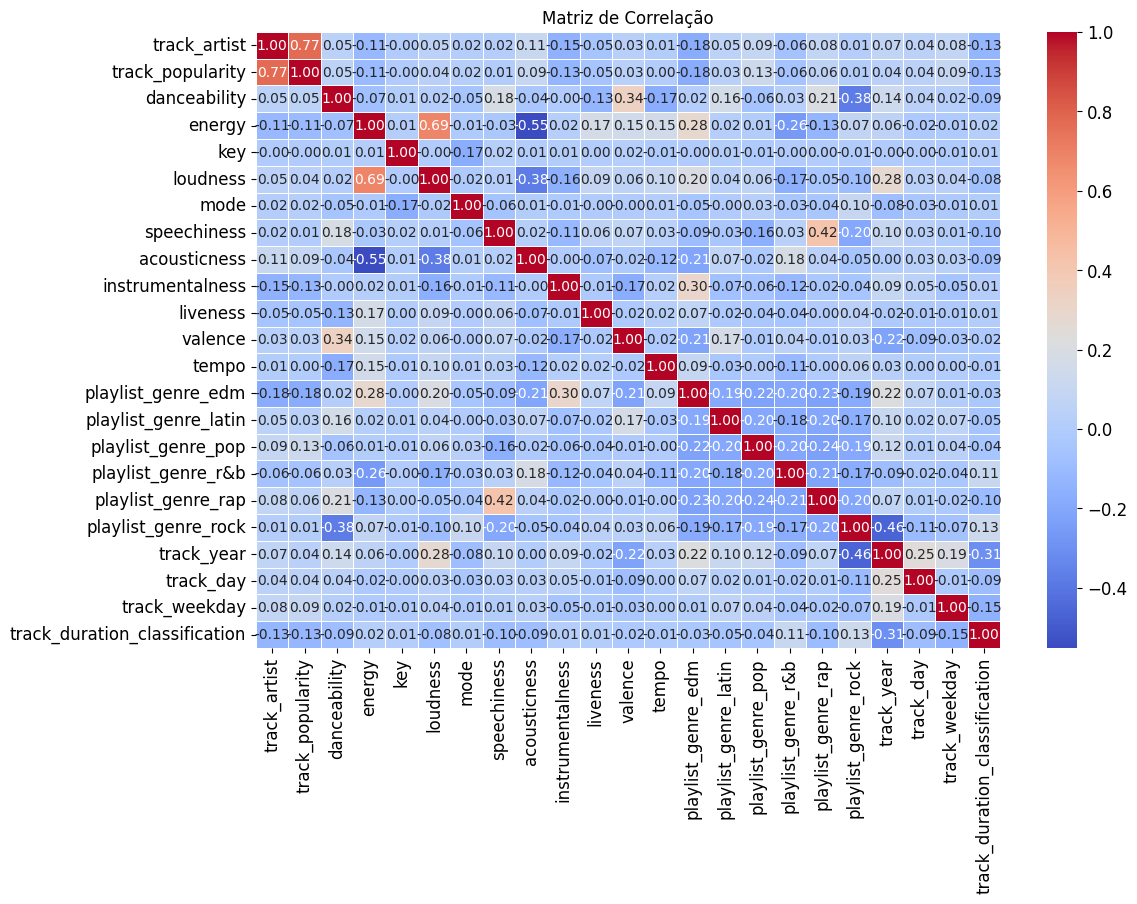

In [112]:
songs_cp = songs.copy()
songs_cp.info()

def crossValidation(modelo, X, y, nome):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Garantindo aleatoriedade

    # Predições via Cross-Validation
    y_pred_cv = cross_val_predict(modelo, X, y, cv=cv)

    # Cálculo das métricas
    r2 = r2_score(y, y_pred_cv)
    mae = mean_absolute_error(y, y_pred_cv)
    mse = mean_squared_error(y, y_pred_cv)
    rmse = np.sqrt(mse)

    # Exibir resultados
    print("""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""")
    print(f"🔹 {nome} (Validação Cruzada - CV=5) 🔹")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print("-" * 40)
    # Plotando a distribuição das predições e dos valores reais
    plt.figure(figsize=(10, 6))

    # Plotando os valores reais
    plt.hist(y, bins=50, alpha=0.5, label="Valores reais", color='blue', edgecolor='black', log=True)

    # Plotando as predições
    plt.hist(y_pred_cv, bins=50, alpha=0.5, label="Predições", color='orange', edgecolor='black', log=True)

    plt.xlabel("Valores")
    plt.ylabel("Frequência")
    plt.title(f"Distribuição das predições e valores reais - {nome}")
    plt.legend(loc="best")
    plt.show()

    # Exibir a importância das features, se o modelo tiver essa informação
    if hasattr(modelo, 'feature_importances_'):
        importance = modelo.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importance
        }).sort_values(by='importance', ascending=False)
        print("🔹 Importância das Features 🔹")
        print(importance_df.head(20))  # Exibir as top 20 features mais importantes
    elif hasattr(modelo, 'coef_'):
        coef = modelo.coef_
        importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': coef
        }).sort_values(by='Coefficient', ascending=False)
        print("🔹 Coeficientes das Features 🔹")
        print(importance_df.head(20))

    # Comparação entre valores reais e preditos
    comparison_df = pd.DataFrame({
    'Real': y.values,
    'Predito': y_pred_cv  # Usa as previsões da validação cruzada
    })
    print("\n🔹 Comparação entre Valores Reais e Preditos 🔹")
    print(comparison_df.head(20))  # Exibir as primeiras 20 comparações

    # Gráfico de dispersão entre valores reais e preditos
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred_cv, alpha=0.5, color='royalblue')
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Preditos")
    plt.title("Comparação entre Valores Reais e Preditos")
    plt.axline((0, 0), slope=1, color='red', linestyle="--")  # Linha de 45 graus (linha ideal)
    plt.show()

    # Gráfico de resíduos
    residuals = y - y_pred_cv

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_cv, residuals, alpha=0.5, color='green')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Valores Preditos")
    plt.ylabel("Resíduos (Erro)")
    plt.title("Gráfico de Resíduos")
    plt.show()

    print("""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""")



# Função para calcular métricas
def avaliar_modelo(modelo, X_train, y_train, nome):
    y_train_pred = modelo.predict(X_train)

    print(f"🔹 {nome} 🔹")
    print(f"R²: {r2_score(y_train, y_train_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
    print(f"RMSE: {mean_squared_error(y_train, y_train_pred) ** 0.5:.4f}")
    print("-" * 40)

# CLASSIFICA A COLUNA 'duration_ms' EM 0,1,2,3,4,5 e 6, NA COLUNA 'track_duration_classification'
def classifyDuration(df, millis_column):
    def classify(millis):
        if isinstance(millis, (int, float)) and millis >= 0:
            duration_minutes = millis / 60000
            if duration_minutes == 0:
                return 0
            elif duration_minutes <= 1:
                return 1
            elif duration_minutes <= 2:
                return 2
            elif duration_minutes <= 3:
                return 3
            elif duration_minutes <= 4:
                return 4
            elif duration_minutes <= 5:
                return 5
            else:
                return 6
        return None

    df['track_duration_classification'] = df[millis_column].apply(classify)
    return df.drop(columns=[millis_column], errors='ignore')

# DECOMPÕE 'duration_ms' EM 'track_minutes' E 'track_seconds'.

def MilisecondsTransform(df, column_name):
    df['track_minutes'] = df[column_name] / 60000  # Convertendo milissegundos para minutos
    df['track_seconds'] = (df[column_name] % 60000) / 1000  # Restante em segundos
    return df.drop(columns=[column_name], errors='ignore')

def decompositionDateTransform(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df['track_year'] = df[date_column].dt.year
    df['track_month'] = df[date_column].dt.month
    df['track_day'] = df[date_column].dt.day
    df['track_weekday'] = df[date_column].dt.weekday
    return df.drop(columns=[date_column], errors='ignore')

def fillMonths(songs: pd.DataFrame) -> pd.DataFrame:
    # Filtrar as linhas onde a data de lançamento tem apenas o ano (4 caracteres)
    df_ano_apenas = songs[songs['track_album_release_date'].str.len() == 4].copy()

    # Filtrar as linhas onde a data de lançamento tem o formato completo (ano-mês-dia)
    df_completo = songs[songs['track_album_release_date'].str.len() == 10].copy()

    # Extrair o mês das músicas com ano-mês-dia
    df_completo['month'] = df_completo['track_album_release_date'].str[5:7]

    # Contar a frequência de cada mês
    month_counts = df_completo['month'].value_counts()

    # Agora vamos preencher os meses nas músicas com ano apenas, de forma proporcional
    months_to_fill = []

    for month, count in month_counts.items():
        months_to_fill.extend([month] * count)

    # Para as músicas faltando mês, vamos preencher com base na lista 'months_to_fill'
    df_ano_apenas['month'] = np.random.choice(months_to_fill, size=len(df_ano_apenas))

    # Agora vamos juntar os dois DataFrames (completo e preenchido) novamente
    df_completo['month'] = df_completo['month']  # As músicas já completas não devem ser modificadas
    df_ano_apenas['track_album_release_date'] = df_ano_apenas['track_album_release_date'] + '-' + df_ano_apenas['month'] + '-01'

    # Substituir as linhas no DataFrame original
    songs.update(df_completo)
    songs.update(df_ano_apenas)

    # Garantir que o retorno seja um DataFrame, não uma Series ou estrutura não 2D
    return songs[['track_album_release_date']]

# NORMALIZAÇÃO DE DADOS NUMÉRICOS

#Normaliza os dados numa escala de 0 a 1.
def normalizeColumns(df,columns_name):
    scaler = MinMaxScaler()
    df[columns_name] = scaler.fit_transform(df[columns_name])
    return df
# REMOÇÃO DE LINHAS - Remove linhas que possuem dados em branco e que não podem ser obtidos por meio de outros dados.

#Utilizar depois de remover as colunas que não serão necessárias para a predição do modelo.
def removeRowNaN(songs_cp):
    songs_cp_sem_nulos = songs_cp.dropna(axis=0, how='any')
    return songs_cp_sem_nulos

def dropRowsEmpty(songs_cp):
    songs_cp_sem_nulos = removeRowNaN(songs_cp)
    valores_nulos_por_coluna = songs_cp_sem_nulos.isna().sum()
    print("\nQuantidade de valores nulos por coluna:")
    songs_cp = songs_cp_sem_nulos
    print(valores_nulos_por_coluna)
    return songs_cp

# REMOÇÃO DE COLUNAS - Remove colunas não úteis para a predição.

def removeColumns(df, columns_name):
    return df.drop(columns=columns_name)

def onehotTopArtists(df):
    df['track_popularity'] = df['track_popularity'].fillna(0)

    artist_stats = df.groupby('track_artist').agg(
        soma_popularidade=('track_popularity', 'sum'),
        qtd_musicas=('track_popularity', 'count')
    ).reset_index()

    # Média ponderada com suavização
    artist_stats['popularidade_artist'] = artist_stats['soma_popularidade'] / (artist_stats['qtd_musicas'])

    # Criar dicionário de popularidade
    artist_popularity_dict = artist_stats.set_index('track_artist')['popularidade_artist'].to_dict()

    # Substituir nome do artista pela popularidade
    df['track_artist'] = df['track_artist'].map(artist_popularity_dict)

    return df.drop(columns=['track_name'], errors='ignore')

# REMOÇÃO DE DUPLICATAS - remove músicas repetidas
def removeDuplicates(df):
    # Adiciona uma coluna auxiliar com o nome da música em lowercase
    df['track_name_lower'] = df['track_name'].str.lower()
    # Remove duplicadas usando a coluna auxiliar
    df_unique = df.drop_duplicates(subset=['track_artist', 'track_name_lower'])
    # Remove a coluna auxiliar antes de retornar
    df_unique = df_unique.drop(columns=['track_name_lower'])
    return df_unique
# Verificação de colinearidade (usando a matriz de correlação)
def check_collinearity(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Matriz de Correlação')
    plt.show()

    # Definir um limiar de correlação, por exemplo, 0.8, e remover colunas com alta correlação
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

    return df.drop(columns=to_drop, errors='ignore')

def feature_engineering(songs_cp, remove_duplicates,
                        remove_empty_rows,
                        onehot_playlist_genre,
                        top_artists,
                        fill_months,
                        decompositionDateTransform_t,
                        classifyDuration_t,
                        milisecondsTransform_t,
                        normalizeColumns_t,
                        check_collinearity_t):

    if remove_duplicates:
        songs_cp = removeDuplicates(songs_cp)

    if remove_empty_rows:
        songs_cp = dropRowsEmpty(songs_cp)

    if onehot_playlist_genre:
        encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=np.int64)
        encoded_genres = encoder.fit_transform(songs_cp[['playlist_genre']])
        encoded_genres_df = pd.DataFrame(encoded_genres, columns=encoder.get_feature_names_out(['playlist_genre']), index=songs_cp.index)
        songs_cp = songs_cp.drop(columns=['playlist_genre'])
        songs_cp = songs_cp.join(encoded_genres_df)

    if top_artists:
        songs_cp = onehotTopArtists(songs_cp)

    if fill_months:
        fillMonths(songs_cp)

    if decompositionDateTransform_t:
        songs_cp = decompositionDateTransform(songs_cp, 'track_album_release_date')

    if classifyDuration_t:
        songs_cp = classifyDuration(songs_cp, 'duration_ms')

    if milisecondsTransform_t:
        songs_cp = MilisecondsTransform(songs_cp, 'duration_ms')

    if normalizeColumns_t:
        numeric_columns = songs_cp.select_dtypes(include=[np.number]).columns
        songs_cp = normalizeColumns(songs_cp, numeric_columns)

    songs_cp = removeColumns(songs_cp, ['track_id', 'track_album_id', 'track_album_name',
                                        'playlist_name', 'playlist_id', 'playlist_subgenre',
                                        'track_month'])

    if check_collinearity_t:
        songs_cp = check_collinearity(songs_cp)

    return songs_cp


songs_test = feature_engineering(songs_cp, remove_duplicates=True,
                               remove_empty_rows=True,
                               onehot_playlist_genre=True,
                               top_artists=True,
                               fill_months=True,
                               decompositionDateTransform_t=True,
                               classifyDuration_t=True,
                               milisecondsTransform_t=False,
                               normalizeColumns_t=True,
                               check_collinearity_t=True)


y = songs_test['track_popularity']
X = songs_test.drop(columns=['track_popularity'])

# Divisão inicial: 70% para treino e 30% para o restante (treino + restante)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.30, random_state=42)

# Divisão do restante: 50% para validação e 50% para teste (validação + teste)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

# Remover linhas com NaN em X_train e y_train
mask = ~np.isnan(X_train).any(axis=1)
X_train = X_train[mask]
y_train = y_train[mask]

mask = ~np.isnan(X_val).any(axis=1)
X_val = X_val[mask]
y_val = y_val[mask]

mask = ~np.isnan(X_test).any(axis=1)
X_test = X_test[mask]
y_test = y_test[mask]

# Passo 3: Treinamento dos modelos
rf_model = RandomForestRegressor(random_state=42)
bayesian_model = BayesianRidge()
ada_model = AdaBoostRegressor(random_state=42)
ridge_model = Ridge(random_state=42)
extra_trees_model = ExtraTreesRegressor(random_state=42)
dnn_model = MLPRegressor(random_state=42)
#estocastico
estimators = [
    ('bayesian', BayesianRidge()),
    ('rf', RandomForestRegressor(random_state=42)),
    ('extra_trees', ExtraTreesRegressor(random_state=42)),
    ('dnn',MLPRegressor(random_state=42)),
    ('ada',AdaBoostRegressor(random_state=42))
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

modelos_base = [
    ('bayesian', BayesianRidge()),
    ('rf', RandomForestRegressor(random_state=42)),
    ('extra_trees', ExtraTreesRegressor(random_state=42)),
    ('dnn',MLPRegressor(random_state=42)),
    ('ada',AdaBoostRegressor(random_state=42))
]
voting_model = VotingRegressor(estimators=modelos_base)










In [113]:
# Treinamento dos modelos
rf_model.fit(X_train, y_train)
bayesian_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
extra_trees_model.fit(X_train, y_train)
dnn_model.fit(X_train, y_train)
stacking_model.fit(X_train, y_train)
voting_model.fit(X_train, y_train)

VotingRegressor(estimators=[('bayesian', BayesianRidge()),
                            ('rf', RandomForestRegressor(random_state=42)),
                            ('extra_trees',
                             ExtraTreesRegressor(random_state=42)),
                            ('dnn', MLPRegressor(random_state=42)),
                            ('ada', AdaBoostRegressor(random_state=42))])

In [114]:
print(len(y_train), len(X_train))
print(len(y_val), len(X_val))

18296 18296
3922 3922



🔹 Random Forest (Validação Cruzada - CV=5) 🔹
R²: 0.5996
MAE: 0.1007
MSE: 0.0226
RMSE: 0.1503
----------------------------------------


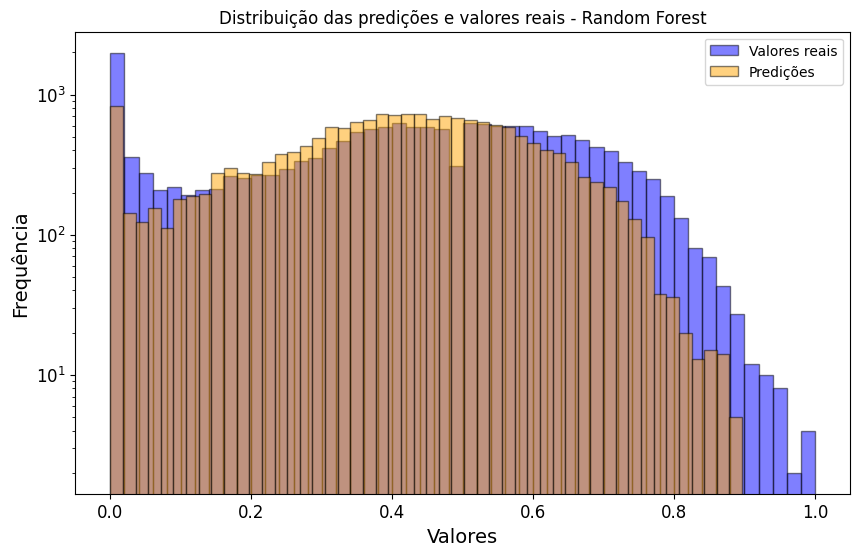

🔹 Importância das Features 🔹
                          feature  importance
0                    track_artist    0.631548
4                        loudness    0.033729
9                        liveness    0.032458
11                          tempo    0.031653
18                     track_year    0.031437
1                    danceability    0.030494
10                        valence    0.030197
7                    acousticness    0.028974
6                     speechiness    0.028824
2                          energy    0.026382
19                      track_day    0.020848
8                instrumentalness    0.019067
3                             key    0.015115
20                  track_weekday    0.010905
21  track_duration_classification    0.007228
14             playlist_genre_pop    0.005645
12             playlist_genre_edm    0.003925
5                            mode    0.003081
16             playlist_genre_rap    0.002922
13           playlist_genre_latin    0.002189

🔹 Co

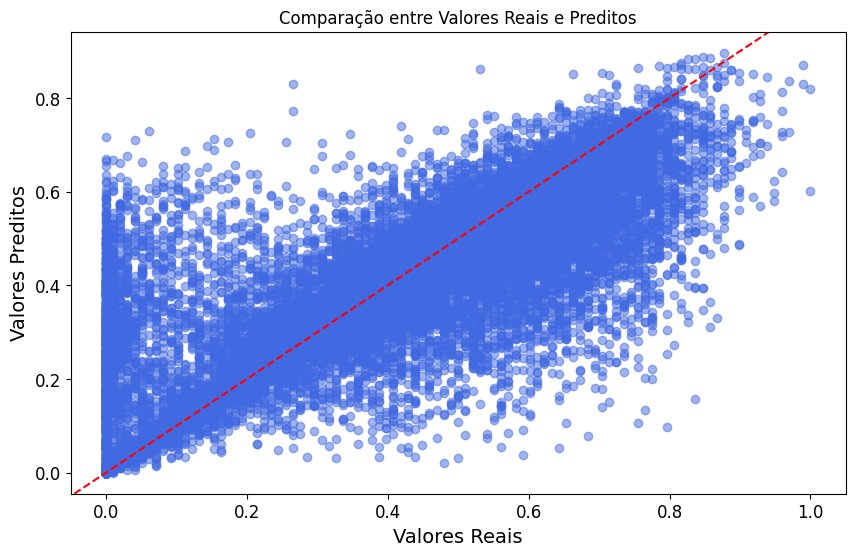

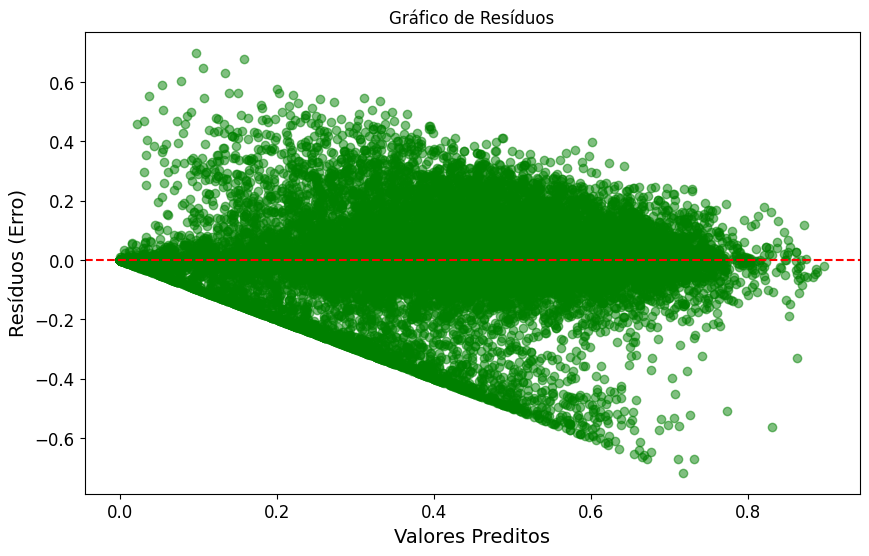



🔹 Bayesian Ridge (Validação Cruzada - CV=5) 🔹
R²: 0.6021
MAE: 0.0986
MSE: 0.0225
RMSE: 0.1499
----------------------------------------


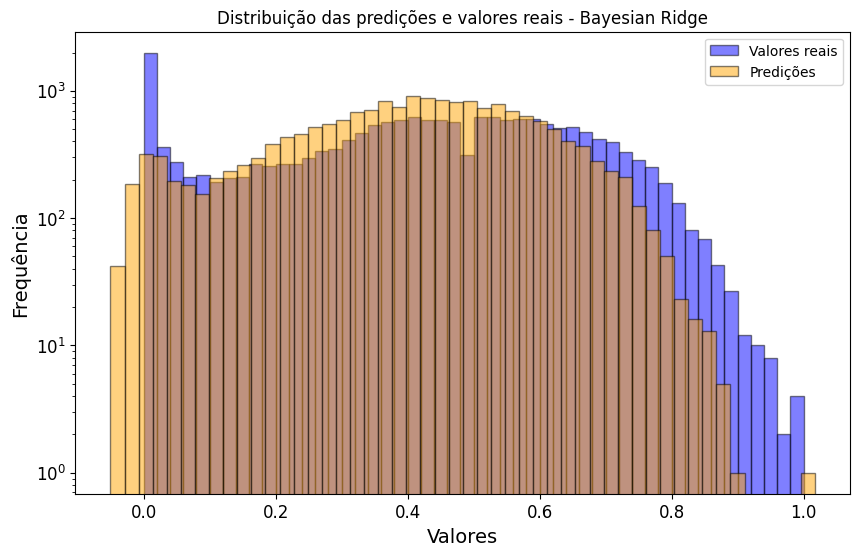

🔹 Coeficientes das Features 🔹
                          Feature  Coefficient
0                    track_artist     0.959941
4                        loudness     0.138306
1                    danceability     0.033564
14             playlist_genre_pop     0.028032
20                  track_weekday     0.026209
11                          tempo     0.015980
19                      track_day     0.010315
6                     speechiness     0.007601
17            playlist_genre_rock     0.005005
5                            mode     0.002475
8                instrumentalness     0.000794
10                        valence     0.000336
3                             key     0.000085
13           playlist_genre_latin    -0.002060
9                        liveness    -0.004075
16             playlist_genre_rap    -0.005505
7                    acousticness    -0.007164
15             playlist_genre_r&b    -0.008353
12             playlist_genre_edm    -0.017120
21  track_duration_classificat

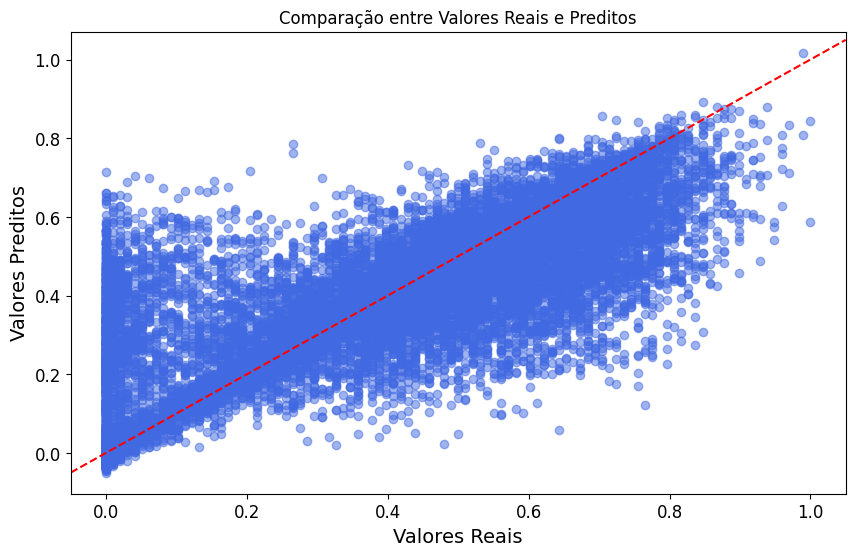

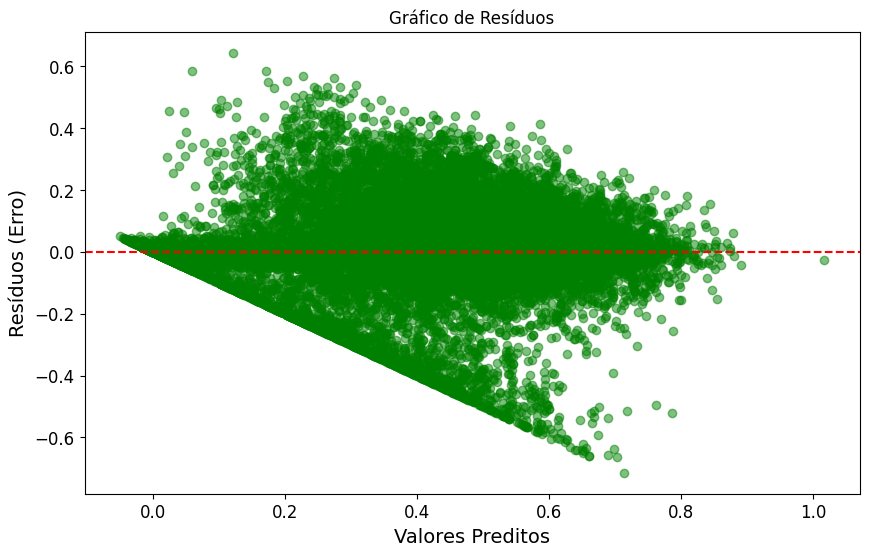



🔹 ada_model (Validação Cruzada - CV=5) 🔹
R²: 0.5459
MAE: 0.1177
MSE: 0.0256
RMSE: 0.1601
----------------------------------------


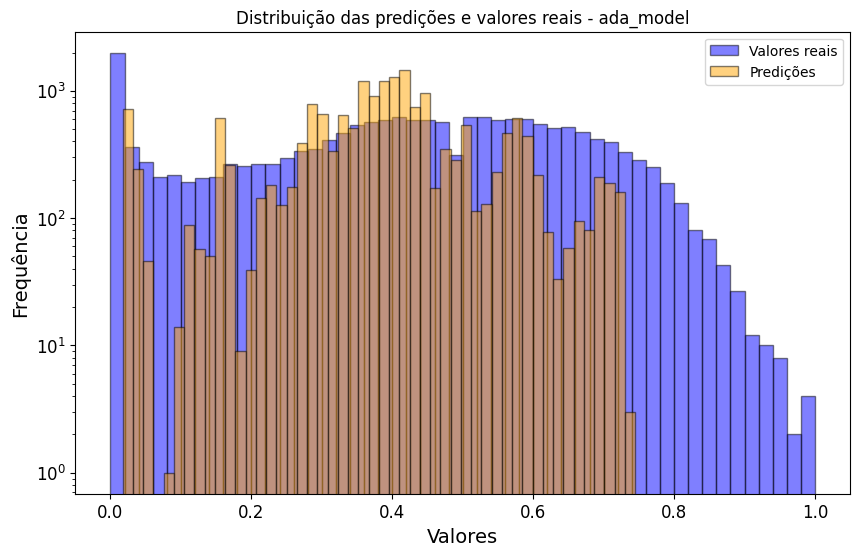

🔹 Importância das Features 🔹
                 feature  importance
0           track_artist    0.758311
18            track_year    0.147078
14    playlist_genre_pop    0.053885
12    playlist_genre_edm    0.027913
2                 energy    0.003728
8       instrumentalness    0.003490
9               liveness    0.002087
20         track_weekday    0.001836
6            speechiness    0.001561
7           acousticness    0.000111
19             track_day    0.000000
17   playlist_genre_rock    0.000000
16    playlist_genre_rap    0.000000
15    playlist_genre_r&b    0.000000
11                 tempo    0.000000
13  playlist_genre_latin    0.000000
1           danceability    0.000000
10               valence    0.000000
5                   mode    0.000000
4               loudness    0.000000

🔹 Comparação entre Valores Reais e Preditos 🔹
        Real   Predito
0   0.428571  0.515598
1   0.489796  0.418155
2   0.010204  0.376385
3   0.306122  0.318122
4   0.571429  0.438413
5   0.000

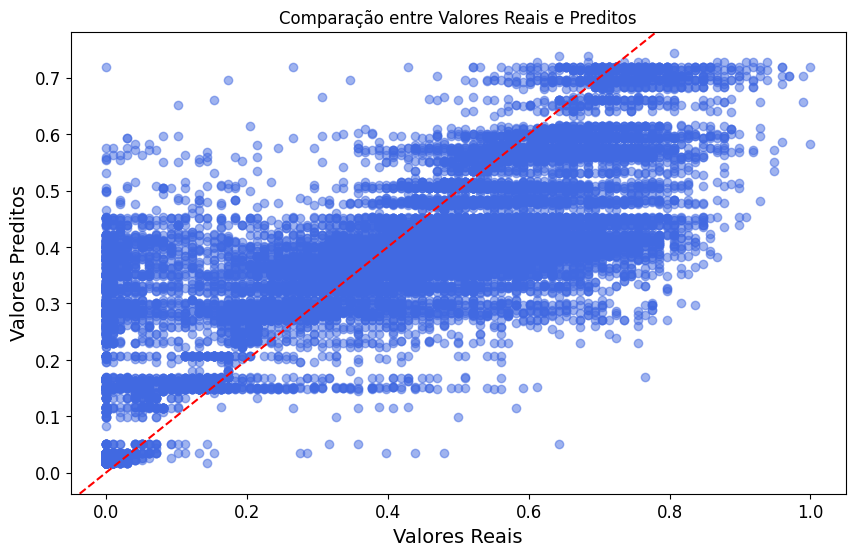

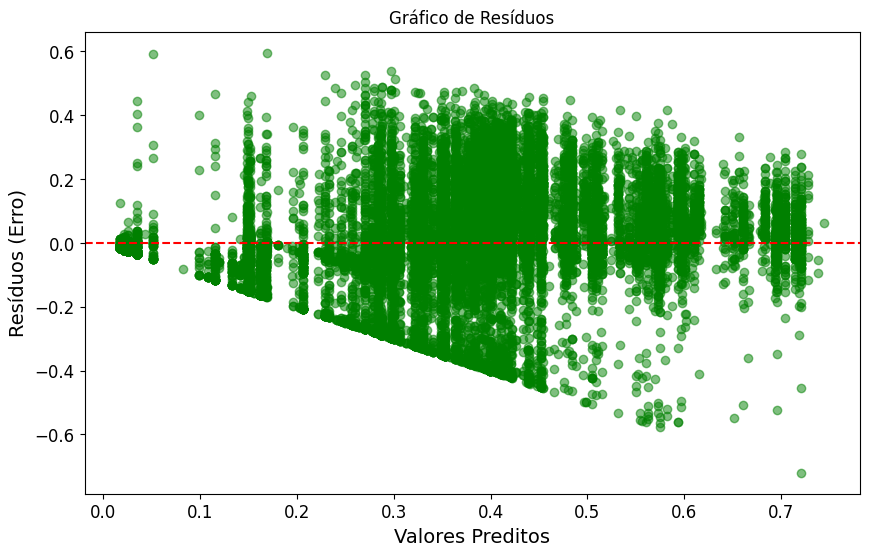



🔹 ridge_model (Validação Cruzada - CV=5) 🔹
R²: 0.6021
MAE: 0.0986
MSE: 0.0225
RMSE: 0.1499
----------------------------------------


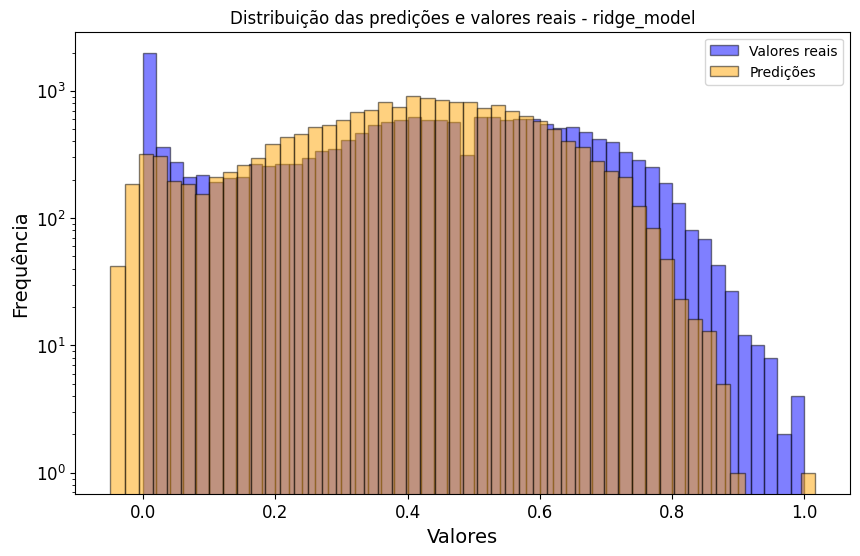

🔹 Coeficientes das Features 🔹
                          Feature  Coefficient
0                    track_artist     0.959158
4                        loudness     0.136307
1                    danceability     0.033596
14             playlist_genre_pop     0.028052
20                  track_weekday     0.026211
11                          tempo     0.015967
19                      track_day     0.010316
6                     speechiness     0.007506
17            playlist_genre_rock     0.005023
5                            mode     0.002479
8                instrumentalness     0.000600
10                        valence     0.000323
3                             key     0.000084
13           playlist_genre_latin    -0.002061
9                        liveness    -0.004126
16             playlist_genre_rap    -0.005473
7                    acousticness    -0.007091
15             playlist_genre_r&b    -0.008372
12             playlist_genre_edm    -0.017170
21  track_duration_classificat

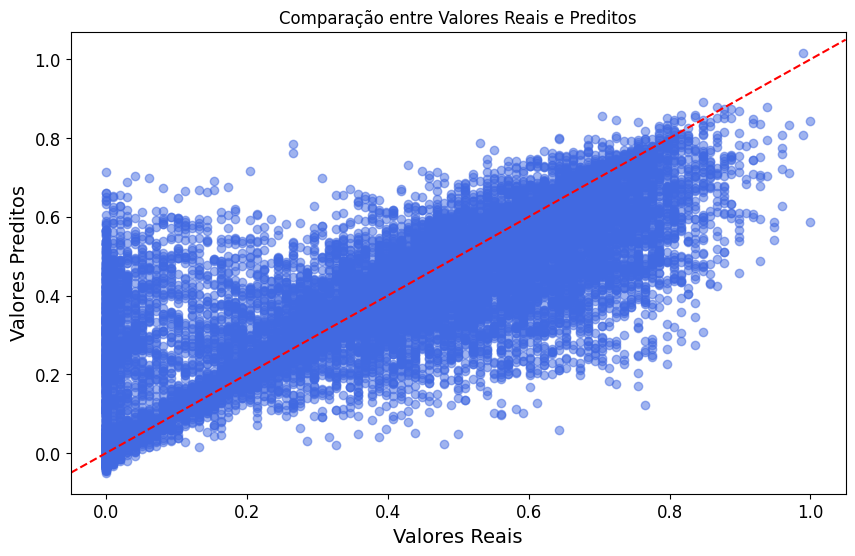

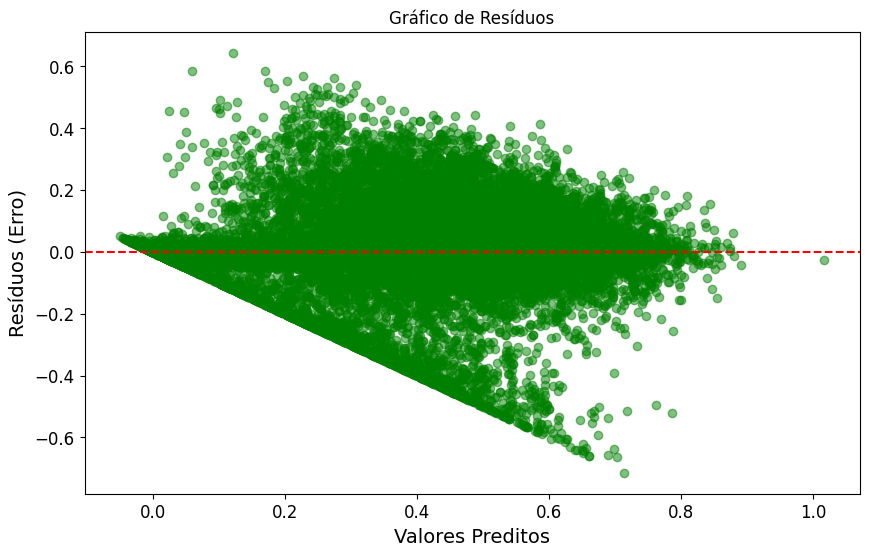



🔹 extra_trees_model (Validação Cruzada - CV=5) 🔹
R²: 0.5945
MAE: 0.1010
MSE: 0.0229
RMSE: 0.1513
----------------------------------------


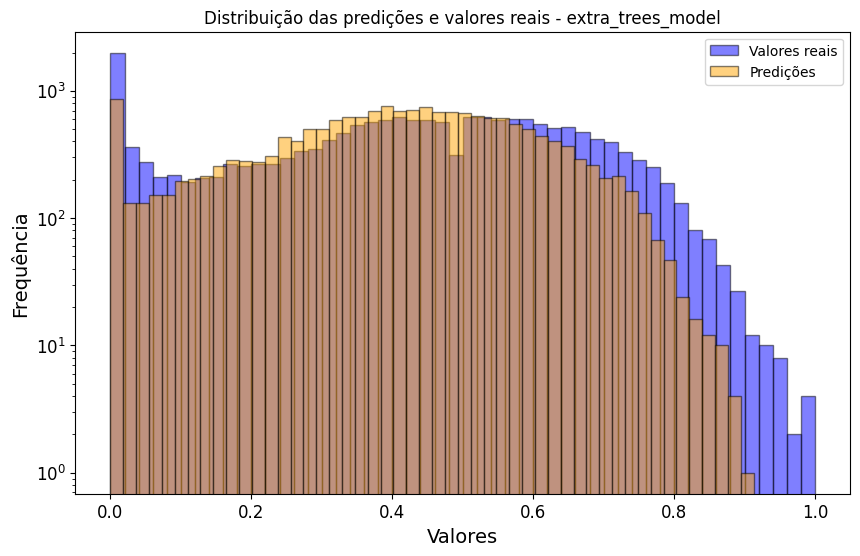

🔹 Importância das Features 🔹
                          feature  importance
0                    track_artist    0.612677
18                     track_year    0.036144
19                      track_day    0.025990
9                        liveness    0.025538
10                        valence    0.024563
11                          tempo    0.024061
4                        loudness    0.023619
1                    danceability    0.023525
6                     speechiness    0.022554
20                  track_weekday    0.022402
3                             key    0.022357
2                          energy    0.022161
7                    acousticness    0.020885
21  track_duration_classification    0.019313
8                instrumentalness    0.016988
12             playlist_genre_edm    0.015756
5                            mode    0.012233
16             playlist_genre_rap    0.006616
14             playlist_genre_pop    0.006507
15             playlist_genre_r&b    0.005725

🔹 Co

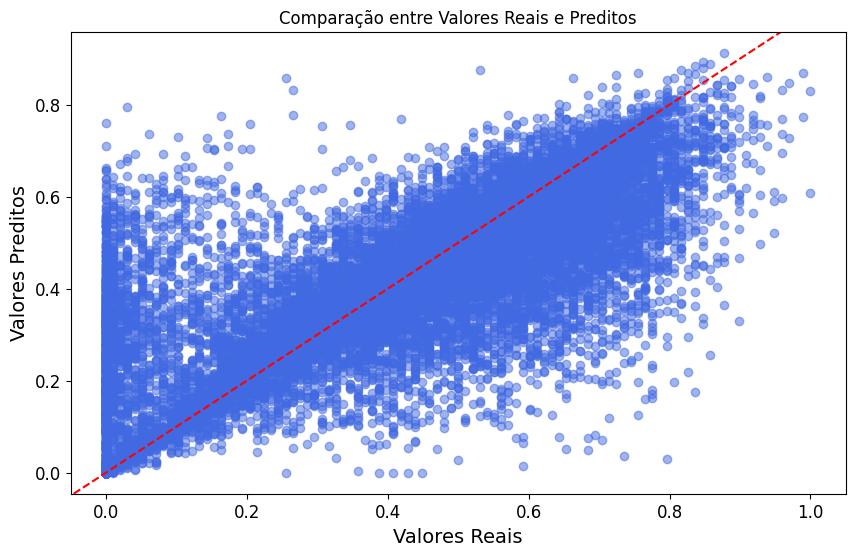

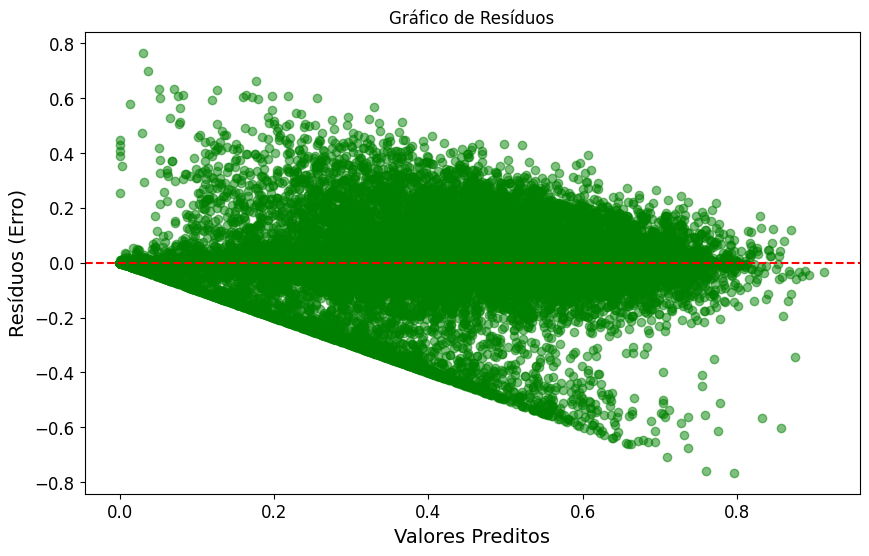



🔹 dnn_model (Validação Cruzada - CV=5) 🔹
R²: 0.5929
MAE: 0.1034
MSE: 0.0230
RMSE: 0.1516
----------------------------------------


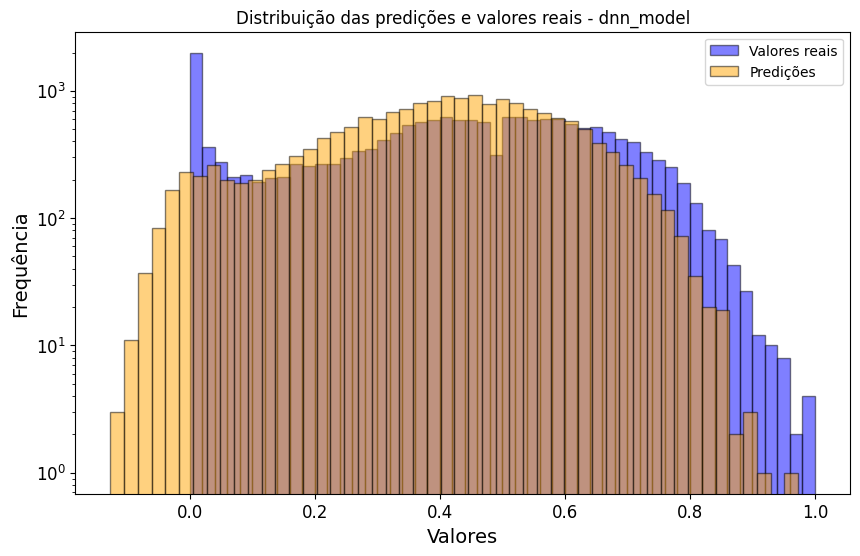


🔹 Comparação entre Valores Reais e Preditos 🔹
        Real   Predito
0   0.428571  0.436850
1   0.489796  0.438719
2   0.010204  0.437552
3   0.306122  0.303705
4   0.571429  0.505655
5   0.000000  0.004026
6   0.142857  0.229922
7   0.724490  0.634956
8   0.377551  0.345073
9   0.336735  0.358482
10  0.489796  0.421352
11  0.571429  0.412031
12  0.602041  0.506938
13  0.397959  0.465847
14  0.346939  0.383528
15  0.612245  0.649020
16  0.153061  0.431151
17  0.704082  0.537623
18  0.000000  0.414671
19  0.397959  0.345434


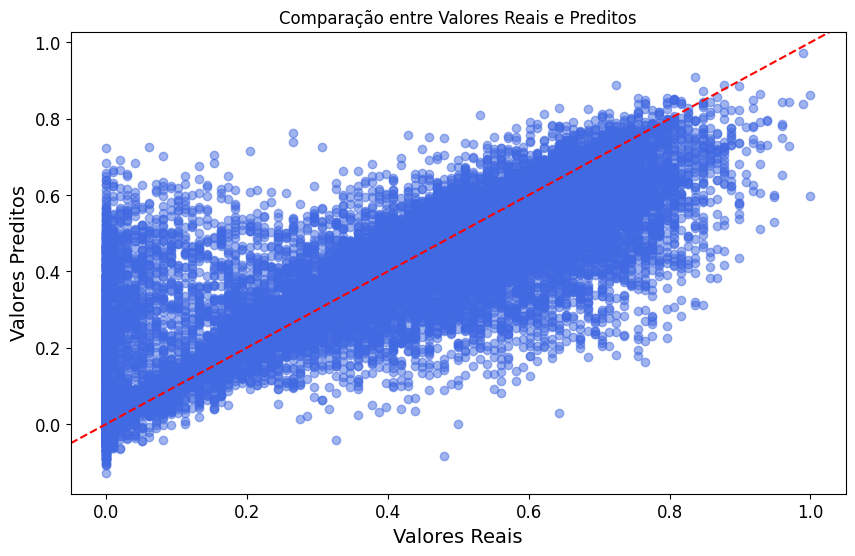

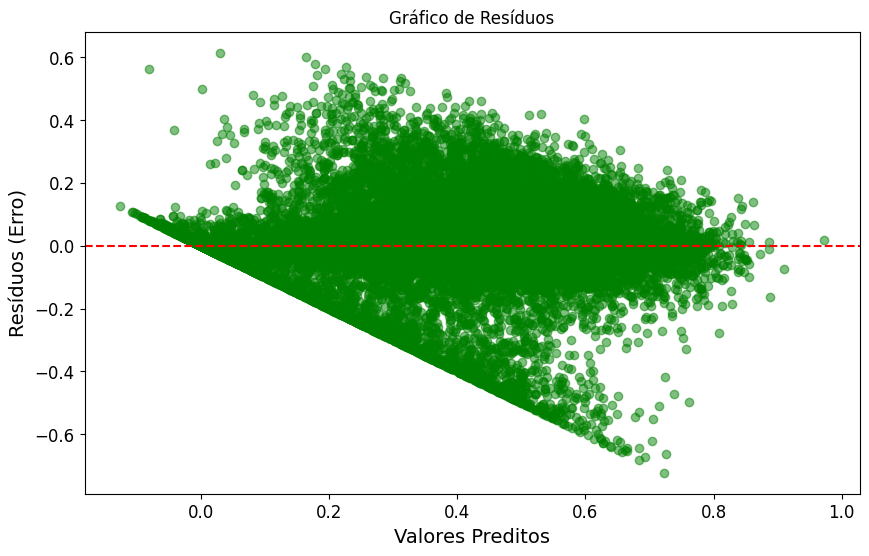



🔹 stacking_model (Validação Cruzada - CV=5) 🔹
R²: 0.6119
MAE: 0.0977
MSE: 0.0219
RMSE: 0.1480
----------------------------------------


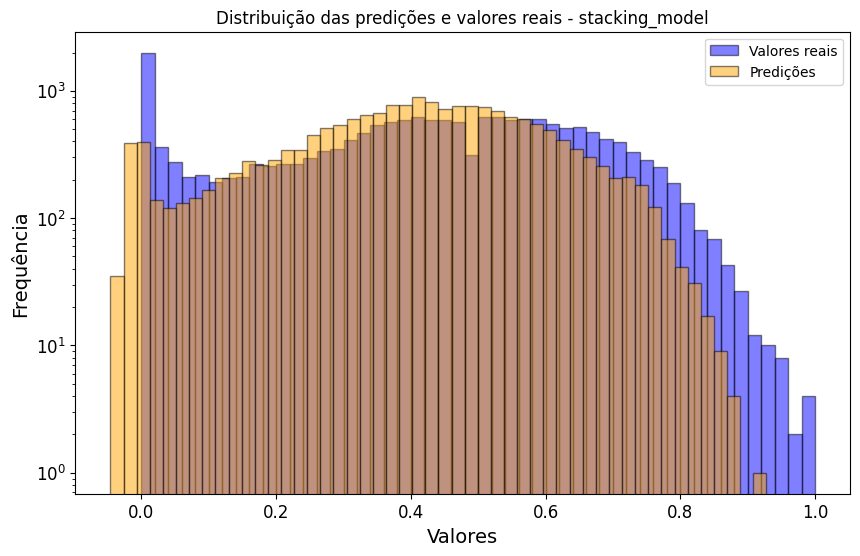


🔹 Comparação entre Valores Reais e Preditos 🔹
        Real   Predito
0   0.428571  0.507999
1   0.489796  0.414292
2   0.010204  0.430150
3   0.306122  0.308205
4   0.571429  0.484581
5   0.000000 -0.000845
6   0.142857  0.243238
7   0.724490  0.615038
8   0.377551  0.359338
9   0.336735  0.404623
10  0.489796  0.488166
11  0.571429  0.431299
12  0.602041  0.564571
13  0.397959  0.413544
14  0.346939  0.402620
15  0.612245  0.642141
16  0.153061  0.430458
17  0.704082  0.549998
18  0.000000  0.402591
19  0.397959  0.411355


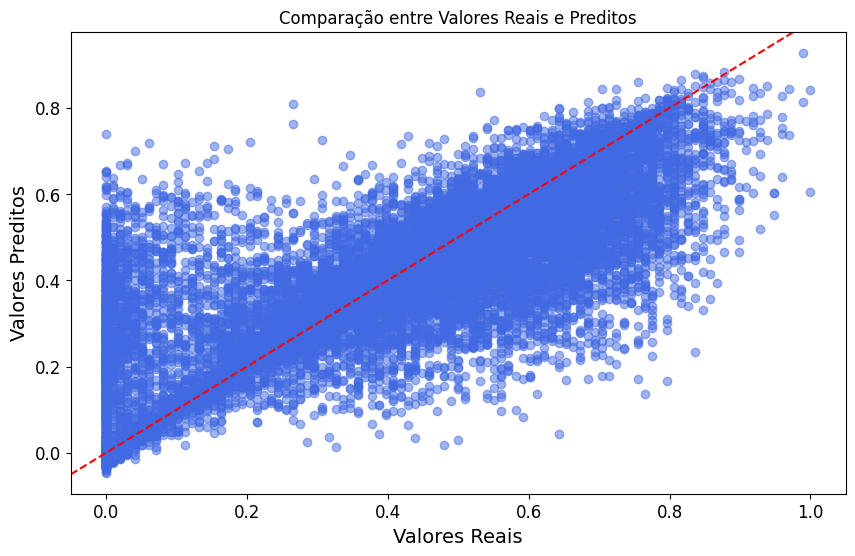

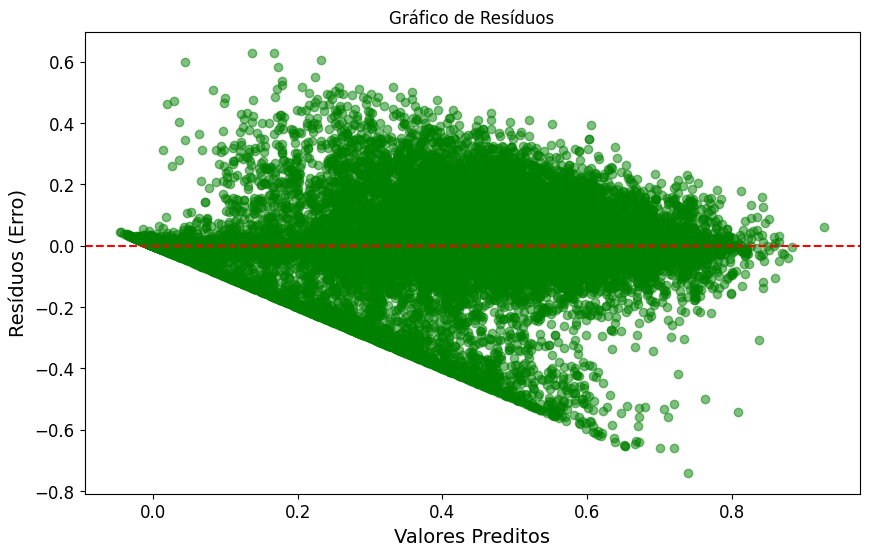



🔹 voting_model (Validação Cruzada - CV=5) 🔹
R²: 0.6098
MAE: 0.0994
MSE: 0.0220
RMSE: 0.1484
----------------------------------------


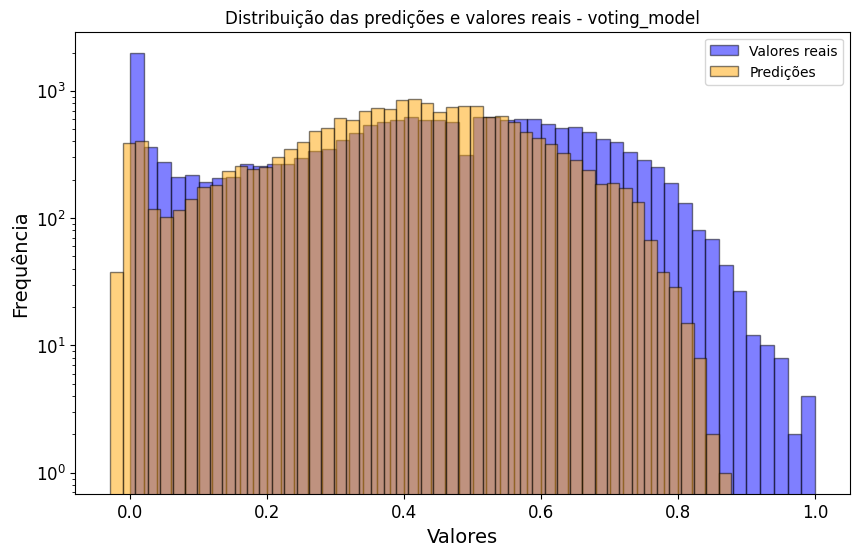


🔹 Comparação entre Valores Reais e Preditos 🔹
        Real   Predito
0   0.428571  0.496227
1   0.489796  0.410841
2   0.010204  0.426355
3   0.306122  0.310656
4   0.571429  0.473113
5   0.000000  0.012663
6   0.142857  0.249474
7   0.724490  0.607153
8   0.377551  0.356752
9   0.336735  0.400877
10  0.489796  0.476592
11  0.571429  0.427245
12  0.602041  0.552397
13  0.397959  0.411353
14  0.346939  0.396051
15  0.612245  0.627873
16  0.153061  0.419540
17  0.704082  0.532352
18  0.000000  0.400677
19  0.397959  0.406306


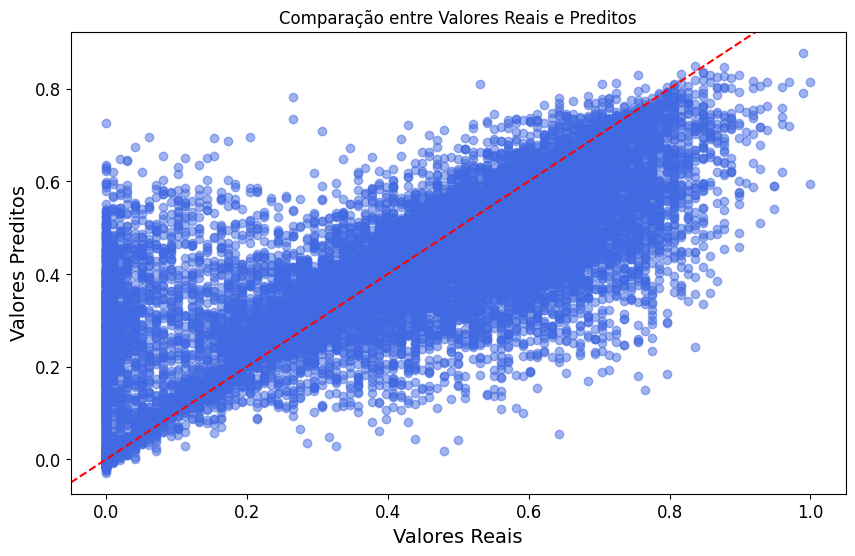

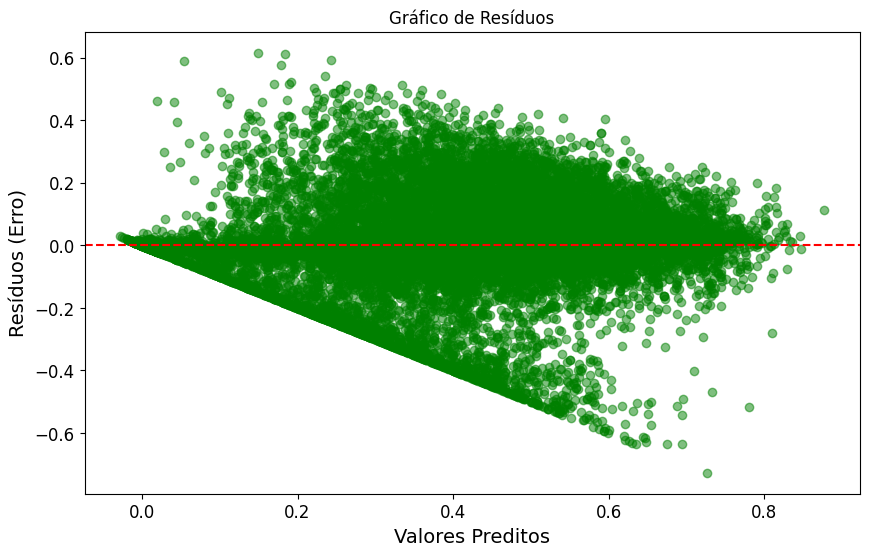

In [117]:
#validando o modelo
crossValidation(rf_model, X_train, y_train, "Random Forest")
crossValidation(bayesian_model, X_train, y_train, "Bayesian Ridge")
crossValidation(ada_model, X_train, y_train, "ada_model")
crossValidation(ridge_model,  X_train, y_train, "ridge_model")
crossValidation(extra_trees_model,  X_train, y_train, "extra_trees_model")
crossValidation(dnn_model,  X_train, y_train, "dnn_model")
crossValidation(stacking_model, X_train, y_train, "stacking_model")
crossValidation(voting_model,  X_train, y_train, "voting_model")

In [123]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np

# 1. Definindo a grade de parâmetros para cada modelo

# Para o AdaBoost Regressor
param_dist_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'loss': ['linear', 'square']
}

# Para o ExtraTreesRegressor
param_dist_extra_trees = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Para o MLP Regressor (DNN)
param_dist_dnn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
}

# Para o RandomForestRegressor
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# 2. Definindo o RandomizedSearchCV para cada modelo

# AdaBoost Regressor
random_search_ada = RandomizedSearchCV(
    AdaBoostRegressor(random_state=42),
    param_distributions=param_dist_ada,
    n_iter=10,  # Número de combinações a serem testadas
    cv=5,  # Validação cruzada com 5 folds
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Extra Trees Regressor
random_search_extra_trees = RandomizedSearchCV(
    ExtraTreesRegressor(random_state=42),
    param_distributions=param_dist_extra_trees,
    n_iter=10,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# DNN (MLP Regressor)
random_search_dnn = RandomizedSearchCV(
    MLPRegressor(random_state=42),
    param_distributions=param_dist_dnn,
    n_iter=10,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# RandomForest Regressor
random_search_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

def print_best_params(random_search, model_name):
    if hasattr(random_search, "cv_results_") and random_search.cv_results_:
        results_df = pd.DataFrame(random_search.cv_results_).sort_values("rank_test_score")
        if not results_df.empty:
            best_params = results_df.iloc[0]["params"]
            print(f"Melhores parâmetros encontrados para {model_name}:", best_params)
        else:
            print(f"Nenhuma iteração foi concluída antes da interrupção para {model_name}.")
    else:
        print(f"Nenhuma iteração foi concluída antes da interrupção para {model_name}.")


In [124]:
try:
    random_search_ada.fit(X_train, y_train)
    print_best_params(random_search_ada, "AdaBoost Regressor")
except KeyboardInterrupt:
    print("\nBusca interrompida para AdaBoost. Obtendo os melhores parâmetros encontrados até agora...")
    print_best_params(random_search_ada, "AdaBoost Regressor")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores parâmetros encontrados para AdaBoost Regressor: {'n_estimators': 200, 'loss': 'linear', 'learning_rate': 0.01}


In [125]:
try:
    random_search_extra_trees.fit(X_train, y_train)
    print_best_params(random_search_extra_trees, "Extra Trees Regressor")
except KeyboardInterrupt:
    print("\nBusca interrompida para Extra Trees. Obtendo os melhores parâmetros encontrados até agora...")
    print_best_params(random_search_extra_trees, "Extra Trees Regressor")


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Busca interrompida para Extra Trees. Obtendo os melhores parâmetros encontrados até agora...
Nenhuma iteração foi concluída antes da interrupção para Extra Trees Regressor.


In [ ]:
try:
    random_search_dnn.fit(X_train, y_train)
    print_best_params(random_search_dnn, "DNN (MLP Regressor)")
except KeyboardInterrupt:
    print("\nBusca interrompida para DNN. Obtendo os melhores parâmetros encontrados até agora...")
    print_best_params(random_search_dnn, "DNN (MLP Regressor)")


In [ ]:
try:
    random_search_rf.fit(X_train, y_train)
    print_best_params(random_search_rf, "Random Forest Regressor")
except KeyboardInterrupt:
    print("\nBusca interrompida para Random Forest. Obtendo os melhores parâmetros encontrados até agora...")
    print_best_params(random_search_rf, "Random Forest Regressor")

RandomForestRegressor(max_depth=19, min_samples_leaf=6, min_samples_split=4,
                      n_estimators=463, random_state=42)